In [62]:
import numpy as np
import matplotlib.pyplot as plt

## 乱数

In [168]:
# 0~1の疑似乱数を生成
for i in range(10):
    print(np.random.rand())

0.7948639394336546
0.25053254470867325
0.4775965709256299
0.1433955029519588
0.5747127096353772
0.6849857866684675
0.10792286682990426
0.851498484487437
0.8945158764217579
0.4445506453315713


In [20]:
# 引数を入れると配列に乱数を入れて返す
print(np.random.rand(5,5))
print()
print(np.random.rand(5))

引数を入れると配列に乱数を入れて返す
[[0.77551161 0.67650328 0.15656353 0.10691353 0.27646354]
 [0.16183877 0.01927597 0.00702253 0.03616616 0.96646421]
 [0.52029349 0.0565208  0.779293   0.99523927 0.07123157]
 [0.69703174 0.84661783 0.44236206 0.7250378  0.09132069]
 [0.43600187 0.50520172 0.13083975 0.86589771 0.30181812]]

[0.76141654 0.92547351 0.73670333 0.2943389  0.98078431]


In [27]:
# 整数の乱数も生成できる
print(np.random.randint(10))
# 範囲指定もできる
print("\n", np.random.randint(-10,5))
# 配列も作れる
print('\n', np.random.randint(-10,5, size=(3,3)))

2

 -6

 [[-9 -2 -8]
 [ 1  4 -1]
 [-7 -7 -1]]


乱数といえど、同じ結果を返してほしいことがある。  
その場合は、**乱数の種（シード）**を設定することで、乱数列を毎回初期化し、同じ結果を返すようになる。

In [37]:
def dice():
    np.random.seed(10)
    return np.random.rand()

for i in range(10):
    print(dice())

0.771320643266746
0.771320643266746
0.771320643266746
0.771320643266746
0.771320643266746
0.771320643266746
0.771320643266746
0.771320643266746
0.771320643266746
0.771320643266746


In [54]:
class Dice:
    def __init__(self):
        np.random.seed(10)
        self.dice = 0
        self.sum = 0
        
    def throw(self):
        self.dice = np.random.randint(1, 7)
        self.sum += self.dice
        return self.dice
    
    def get_sum(self):
        return self.sum

dice = Dice()
for i in range(10):
    print(dice.throw())
print('\n合計', dice.get_sum(), '\n')

dice = Dice()
dice2 = Dice()
for i in range(10):
    print(dice.throw())
    print(dice2.throw())
print('\n合計', dice.get_sum())
print('\n合計', dice2.get_sum())

2
6
5
1
2
4
5
2
6
1

合計 34 

2
6
5
1
2
4
5
2
6
1
6
2
3
1
2
1
3
1
5
4

合計 39

合計 23


throw関数を呼び出した回数によって、乱数の再現性を保っているつもりである。  
しかし、インスタンスを複数生成し、throw関数をそれぞれのインスタンスで交互に呼び出すと、結果としてインスタンスごとの返り値が異なってしまう。  
これは、それぞれのインスタンスが、同じ乱数発生器を使っていることで生じる。  
インスタンスごとに独立した乱数発生器を持たせたい場合は、`np.random.RandomState`クラスを使う。  

In [61]:
class Dice:
    def __init__(self, seed=None):
        self.random_state = np.random.RandomState(seed)
        self.dice = 0
        self.sum = 0
        
    def throw(self):
        self.dice = self.random_state.randint(1, 7)
        self.sum += self.dice
        return self.dice
    
    def get_sum(self):
        return self.sum

dice = Dice(10)
dice2 = Dice(10)
for i in range(10):
    print(dice.throw())
    print(dice2.throw())
print('\n合計', dice.get_sum())
print('\n合計', dice2.get_sum())

2
2
6
6
5
5
1
1
2
2
4
4
5
5
2
2
6
6
1
1

合計 34

合計 34


## データの可視化

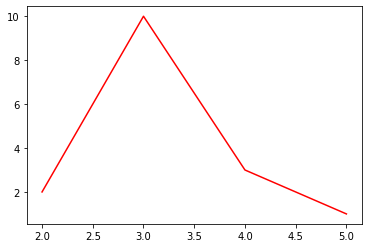

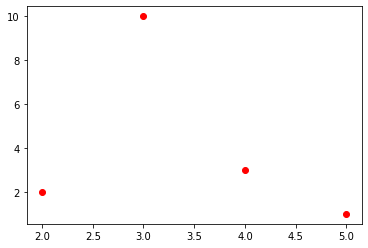

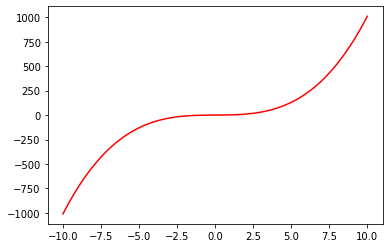

In [98]:
x = ([2,3,4,5])
y = ([2, 10, 3, 1])

# 折線グラフ
plt.plot(x, y, color="r")
plt.show()

# 散布図
plt.scatter(x, y, color="r")
plt.show()

# 曲線。linspace関数で範囲の値を細かく分割する
x = np.linspace(-10, 10, 100)
y = x**3 + x
plt.plot(x, y, color="r")
plt.show()

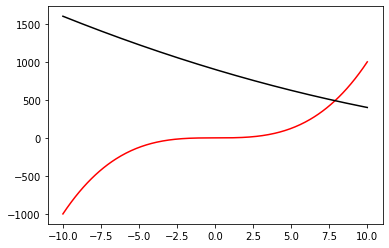

In [105]:
# 複数のグラフをプロットする
x = np.linspace(-10,10,300)
y1 = x**3
y2 = (x-30)**2

plt.plot(x, y1, color='r')
plt.plot(x, y2, color='k')
plt.show()

#### ヒストグラム

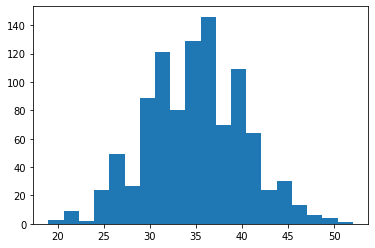

In [134]:
# サイコロを　10回振って合計を返す
def dice_sum():
    return np.random.randint(1,7,size=(10)).sum()

# 結果の再現性を維持するためにseedを設定
np.random.seed(0)

# 1000回繰り替えし、リストに追加していく
list = []
for i in range(1000):
    list.append(dice_sum())

# 各要素の最小値〜最大値を20分割し、ヒストグラムにする
plt.hist(list, 20)
plt.show()

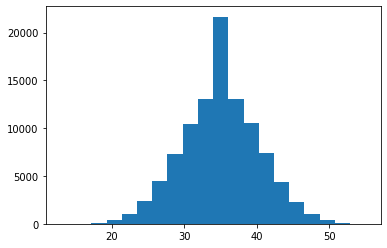

In [139]:
# ついでに、試行回数を増やすとどうなるのか
np.random.seed(0)
list = []
for i in range(100000):
    list.append(dice_sum())

plt.hist(list, 20)
plt.show()
# 期待値の35が突出している

#### 複数のグラフを並べて描画する

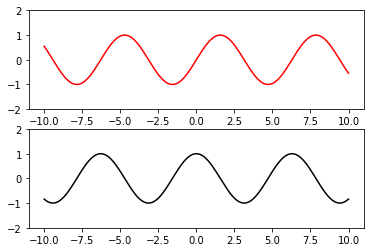

In [166]:
x = np.linspace(-10,10,300)
y1 = np.sin(x)
y2 = np.cos(x)

# 2行1列のグラフを作成
fig, axes = plt.subplots(2, 1)

# y軸の範囲定義　（特に定義しなくても自動でやってくれる）
axes[0].set_ylim([-2, 2])
axes[1].set_ylim([-2, 2])

# プロット
axes[0].plot(x, y1, color='r')
axes[1].plot(x, y2, color='k')
plt.show()